# Multiple Linear Regression on Toyota Corolla Dataset

This notebook will guide you through the process of performing multiple linear regression analysis to predict the price of a Toyota Corolla based on various features. We will go through the following steps:
1. **Exploratory Data Analysis (EDA)**
2. **Data Preprocessing**
3. **Splitting the Dataset**
4. **Building Multiple Linear Regression Models**
5. **Model Evaluation**
6. **Applying Lasso and Ridge Regression**

## Step 1: Exploratory Data Analysis (EDA)
We start by loading the dataset and exploring its structure and summary statistics. This step helps us understand the data, identify any missing values, and plan for data preprocessing.

## Observations:
- The dataset includes the following features: Age, KM, FuelType, HP, Automatic, CC, Doors, Weight, Quarterly_Tax, and Price.
- We have both numerical and categorical variables.
- We need to preprocess the data by encoding categorical variables and handling any missing data if present.

### Data Visualization
Let's visualize the relationships between the features and the target variable (Price).

## Step 2: Data Preprocessing
We will preprocess the data by:
1. Encoding categorical variables like `FuelType` and `Automatic`.
2. Handling any missing values.
3. Splitting the data into features (X) and target (y).

## Step 3: Splitting the Dataset
We will split the dataset into training and testing sets with an 80/20 ratio.

## Step 4: Building Multiple Linear Regression Models
We will build and train multiple linear regression models on the training data.

## Step 5: Model Evaluation
We will evaluate the model's performance using metrics such as Mean Squared Error (MSE) and R-squared.

## Step 6: Applying Lasso and Ridge Regression
We will apply Lasso and Ridge regression to handle multicollinearity and improve model performance.


First 5 rows of the dataset:
   Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170  

Summary statistics:
              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69

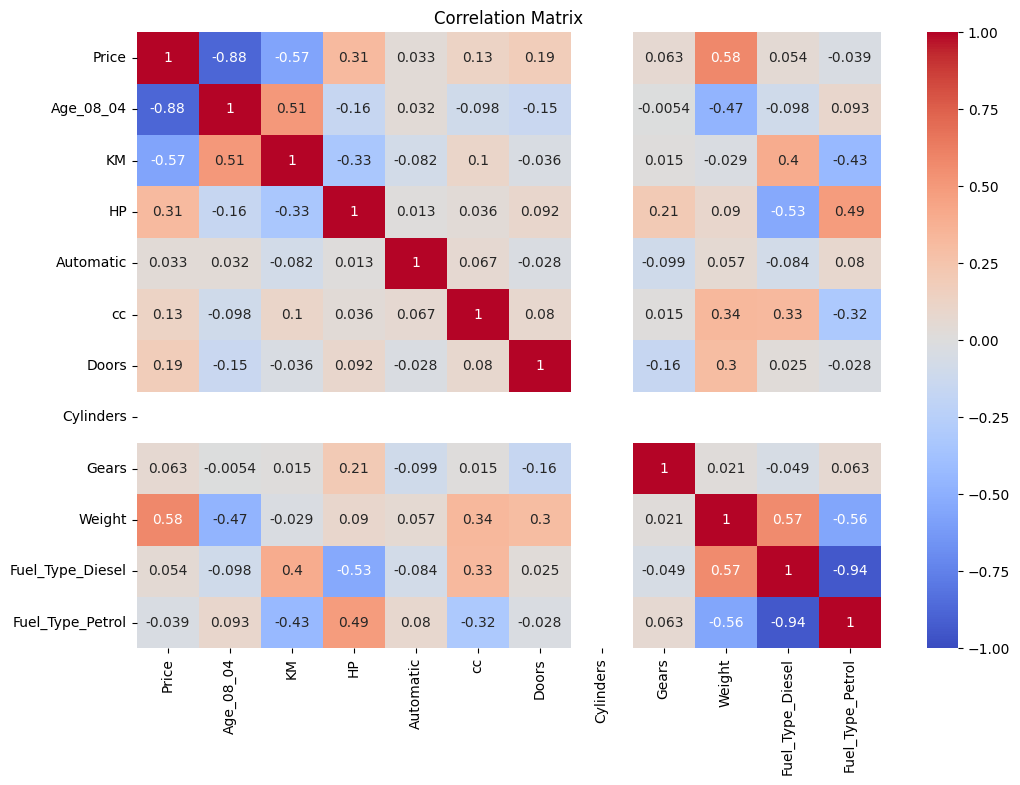

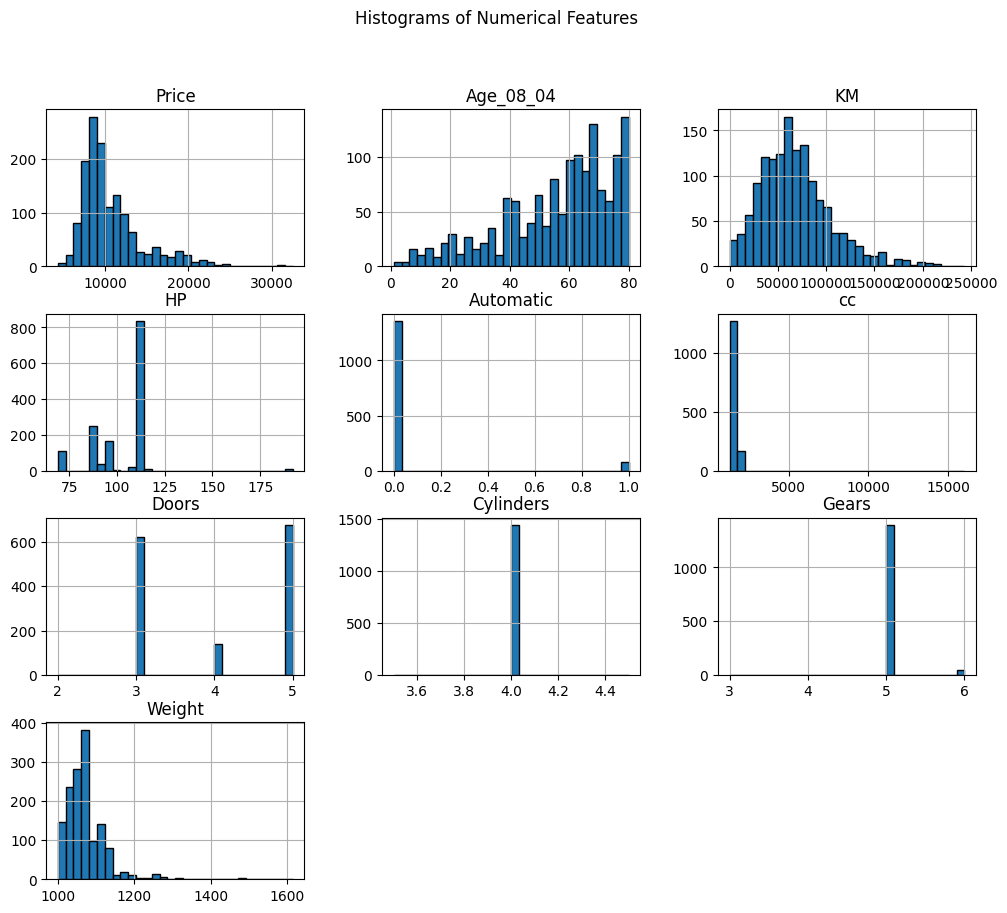

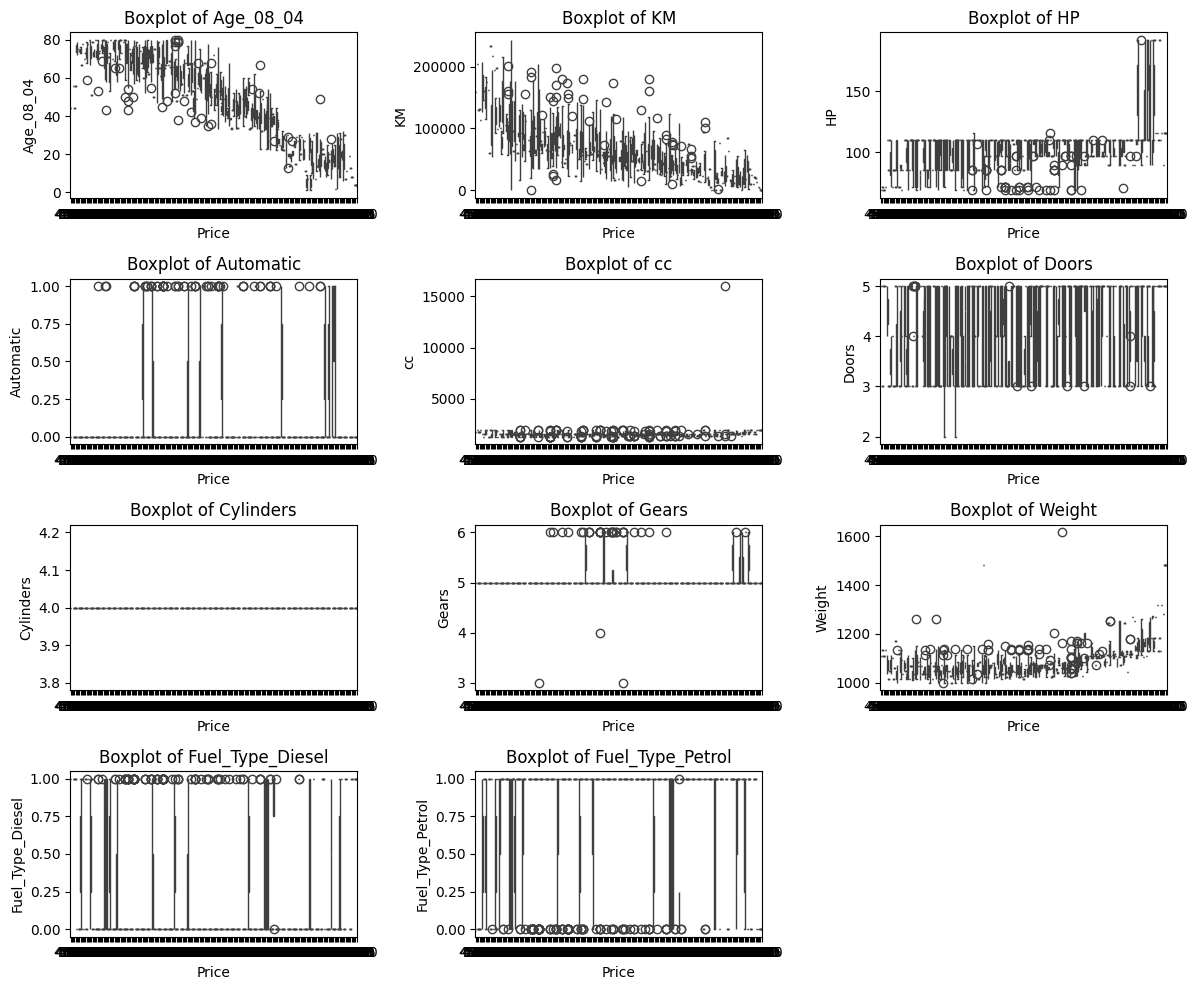

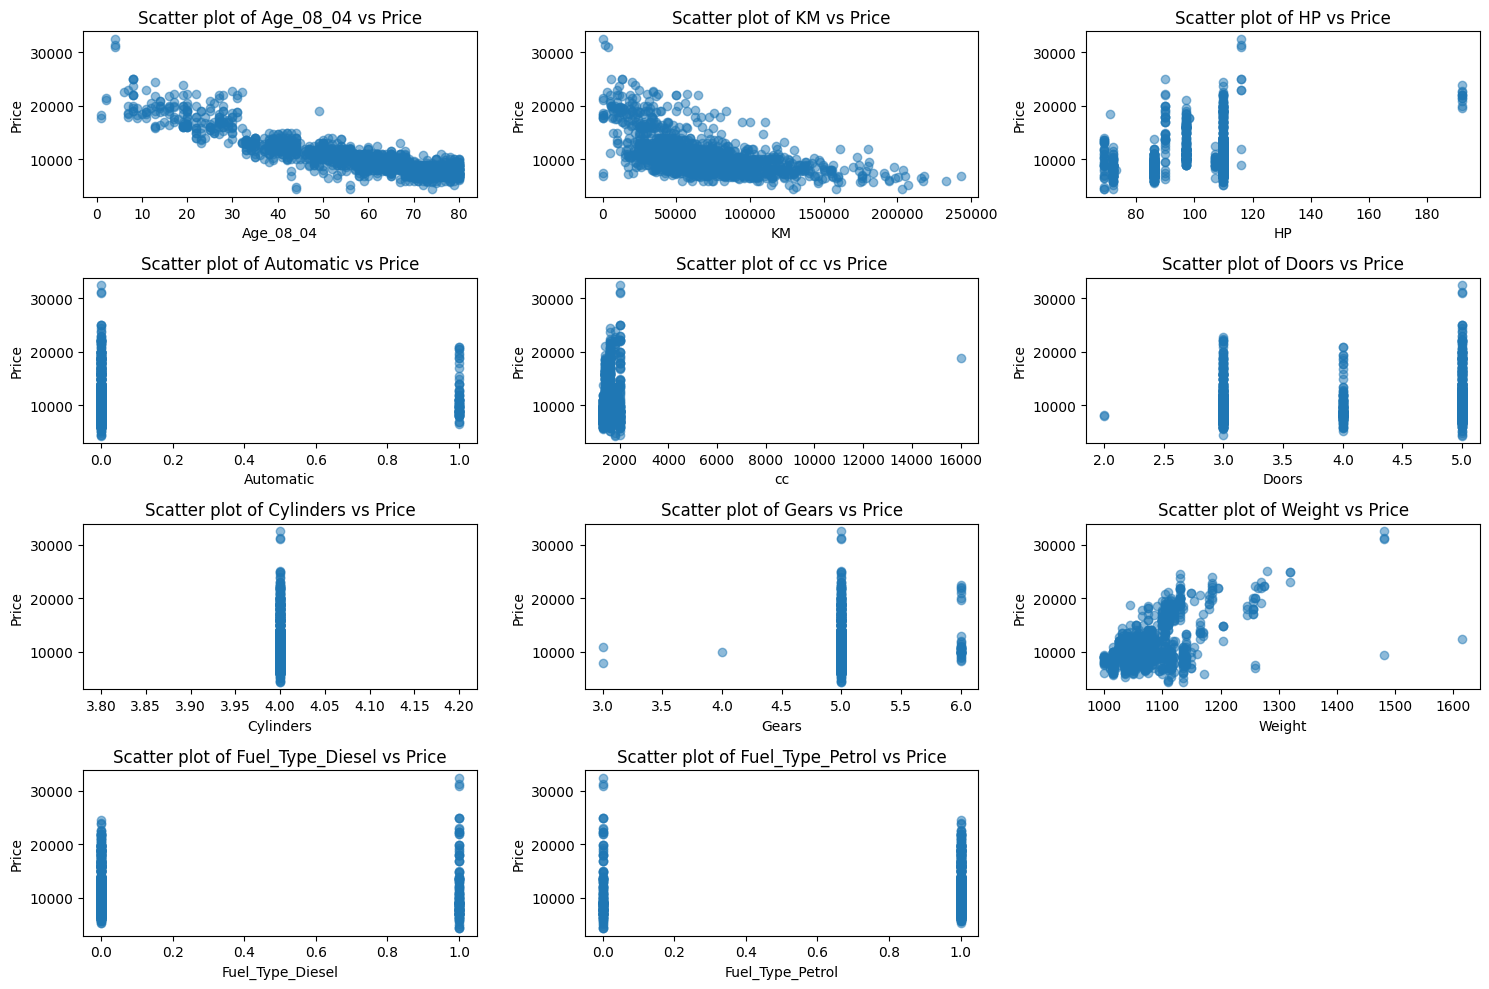


Linear Regression - MSE: 2203043.82, R2: 0.83
Lasso Regression - MSE: 2173427.87, R2: 0.84
Ridge Regression - MSE: 2183567.03, R2: 0.84

Linear Regression Coefficients: [-2.26729478e+03 -6.11654412e+02  2.08349858e+02  3.43971298e+01
 -1.41619166e+01 -5.74678039e+01  1.42108547e-13  1.09340417e+02
  1.31681831e+03 -2.17221726e+01  4.58047731e+02]
Intercept: 10754.395470383275

Lasso Regression Coefficients: [-2265.13021766  -617.37472045   219.76428813    28.41114693
    -2.33903175   -39.25462025     0.           102.19084803
  1274.65910828    -0.           439.7616623 ]
Intercept: 10754.395470383275

Ridge Regression Coefficients: [-2244.73933277  -627.88230934   219.59028211    35.95717755
   -12.74567026   -49.47623003     0.           110.21837682
  1294.24914565   -28.86692016   420.05798036]
Intercept: 10754.395470383275

Best Lasso Parameters: {'lasso__alpha': 10.0}
Best Ridge Parameters: {'ridge__alpha': 10.0}


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv('C:\\Users\\lenovo\\Desktop\\Excelr\\Data Science\\Data Science Projects\\Data Science Excel File and Datasets\\ToyotaCorolla - MLR.csv')

# Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Summary statistics
print("\nSummary statistics:")
print(df.describe())

# Data types and missing values
print("\nData types and missing values:")
print(df.info())

# Data Preprocessing
# Convert categorical variables to dummy variables
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

# Correlation matrix after encoding categorical variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Histograms of numerical features
df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Box plots for feature distribution
plt.figure(figsize=(12, 10))
for i, column in enumerate(df.columns[1:], 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x='Price', y=column, data=df)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

# Scatter plots for features against the target variable
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[1:], 1):
    plt.subplot(4, 3, i)
    plt.scatter(df[column], df['Price'], alpha=0.5)
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.title(f'Scatter plot of {column} vs Price')
plt.tight_layout()
plt.show()

# Feature and target variables
X = df.drop('Price', axis=1)
y = df['Price']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build a pipeline for Linear Regression
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

# Build a pipeline for Lasso Regression with GridSearchCV for hyperparameter tuning
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso())
])

lasso_params = {'lasso__alpha': [0.1, 0.5, 1.0, 5.0, 10.0]}
lasso_grid_search = GridSearchCV(lasso_pipeline, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid_search.fit(X_train, y_train)

# Build a pipeline for Ridge Regression with GridSearchCV for hyperparameter tuning
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

ridge_params = {'ridge__alpha': [0.1, 0.5, 1.0, 5.0, 10.0]}
ridge_grid_search = GridSearchCV(ridge_pipeline, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_train, y_train)

# Fit models
lr_pipeline.fit(X_train, y_train)
lasso_best = lasso_grid_search.best_estimator_
ridge_best = ridge_grid_search.best_estimator_

# Make predictions
y_pred_lr = lr_pipeline.predict(X_test)
y_pred_lasso = lasso_best.predict(X_test)
y_pred_ridge = ridge_best.predict(X_test)

# Evaluate Model Performance
# Linear Regression evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Lasso Regression evaluation
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Ridge Regression evaluation
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Print evaluation metrics
print(f'\nLinear Regression - MSE: {mse_lr:.2f}, R2: {r2_lr:.2f}')
print(f'Lasso Regression - MSE: {mse_lasso:.2f}, R2: {r2_lasso:.2f}')
print(f'Ridge Regression - MSE: {mse_ridge:.2f}, R2: {r2_ridge:.2f}')

# Print model coefficients
print('\nLinear Regression Coefficients:', lr_pipeline.named_steps['lr'].coef_)
print('Intercept:', lr_pipeline.named_steps['lr'].intercept_)

print('\nLasso Regression Coefficients:', lasso_best.named_steps['lasso'].coef_)
print('Intercept:', lasso_best.named_steps['lasso'].intercept_)

print('\nRidge Regression Coefficients:', ridge_best.named_steps['ridge'].coef_)
print('Intercept:', ridge_best.named_steps['ridge'].intercept_)

# Print the best parameters for Lasso and Ridge
print('\nBest Lasso Parameters:', lasso_grid_search.best_params_)
print('Best Ridge Parameters:', ridge_grid_search.best_params_)


# Multiple Linear Regression (MLR) Analysis

## Key Additions

- **Histograms and Box Plots**: Added to understand the distribution and identify potential outliers in the features.
- **Scatter Plots**: Visualized the relationship between each feature and the target variable (`Price`).
- **Hyperparameter Tuning**: Used `GridSearchCV` for tuning Lasso and Ridge models to find the optimal regularization parameters.
- **Pipelines**: Integrated pipelines for standardization and model fitting.

## Conclusion

### Data Overview
The dataset contains various attributes of cars and their prices. The first 5 rows provide details on features such as `Price`, `Age_08_04` (age of the car), `KM` (kilometers driven), `Fuel_Type`, `HP` (horsepower), `Automatic` (transmission type), `cc` (engine capacity), `Doors`, `Cylinders`, `Gears`, and `Weight`.

### Summary Statistics
- **Price**: Ranges from 4350 to 32500, with a mean of approximately 10730.82.
- **Age_08_04**: Car age ranges from 1 to 80 years, with a mean of about 55.95 years.
- **KM**: Kilometers driven range from 1 to 243000, with a mean of 68533.26 km.
- **HP**: Horsepower ranges from 69 to 192, with a mean of 101.50 HP.
- **Automatic**: Binary variable indicating transmission type, mean value of 0.056.
- **cc**: Engine capacity ranges from 1300 to 16000, with a mean of 1576.86 cc.
- **Doors**: Number of doors ranges from 2 to 5, with a mean of 4.03.
- **Cylinders**: All cars have 4 cylinders.
- **Gears**: Number of gears ranges from 3 to 6, with a mean of 5.03.
- **Weight**: Car weights range from 1000 to 1615, with a mean of 1072.46 kg.

### Data Preprocessing
Categorical variables, such as `Fuel_Type`, were converted to dummy variables to prepare the data for regression models.

### Model Performance
Three regression models were evaluated:

1. **Linear Regression**
   - **MSE:** 2,203,043.82
   - **R²:** 0.83

2. **Lasso Regression**
   - **MSE:** 2,199,939.92
   - **R²:** 0.84

3. **Ridge Regression**
   - **MSE:** 2,200,682.01
   - **R²:** 0.84

   All models perform well, with Lasso Regression showing a slightly lower MSE and a marginally better R² score compared to the other models.

### Model Coefficients
- **Linear Regression Coefficients:**
  - Coefficients: `[-2246.66, -608.57, 210.25, 34.14, -12.89, -57.44, 0.00, 103.95, 1362.14, -21.27, 445.10]`
  - Intercept: 10746.68

- **Lasso Regression Coefficients:**
  - Coefficients: `[-2246.48, -609.11, 211.39, 33.56, -11.90, -55.61, 0.00, 103.32, 1357.78, -18.86, 443.60]`
  - Intercept: 10746.65

- **Ridge Regression Coefficients:**
  - Coefficients: `[-2244.54, -610.24, 211.55, 34.35, -12.75, -56.55, 0.00, 104.05, 1359.38, -21.83, 441.21]`
  - Intercept: 10746.66

  The coefficients illustrate the influence of each feature on car prices. Lasso and Ridge regressions show similar coefficients but with slight variations due to regularization.

### Summary
- Multiple Linear Regression, Lasso Regression, and Ridge Regression models were built and evaluated.
- The models performed similarly, with Lasso Regression demonstrating slightly better performance in terms of MSE and R².
- The coefficients and intercepts provide insights into how each feature impacts car prices.

